In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"D:\CSV FILES/Student_performance_data _.csv")

In [8]:
print("Shape:", df.shape)
df.head()
df.info()


Shape: (2392, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [10]:
df.describe(include='all').T


,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


In [11]:
missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nMissing Value Percentage:\n", missing_percent)



Missing Value Percentage:
 StudentID            0.0
Age                  0.0
Gender               0.0
Ethnicity            0.0
ParentalEducation    0.0
StudyTimeWeekly      0.0
Absences             0.0
Tutoring             0.0
ParentalSupport      0.0
Extracurricular      0.0
Sports               0.0
Music                0.0
Volunteering         0.0
GPA                  0.0
GradeClass           0.0
dtype: float64


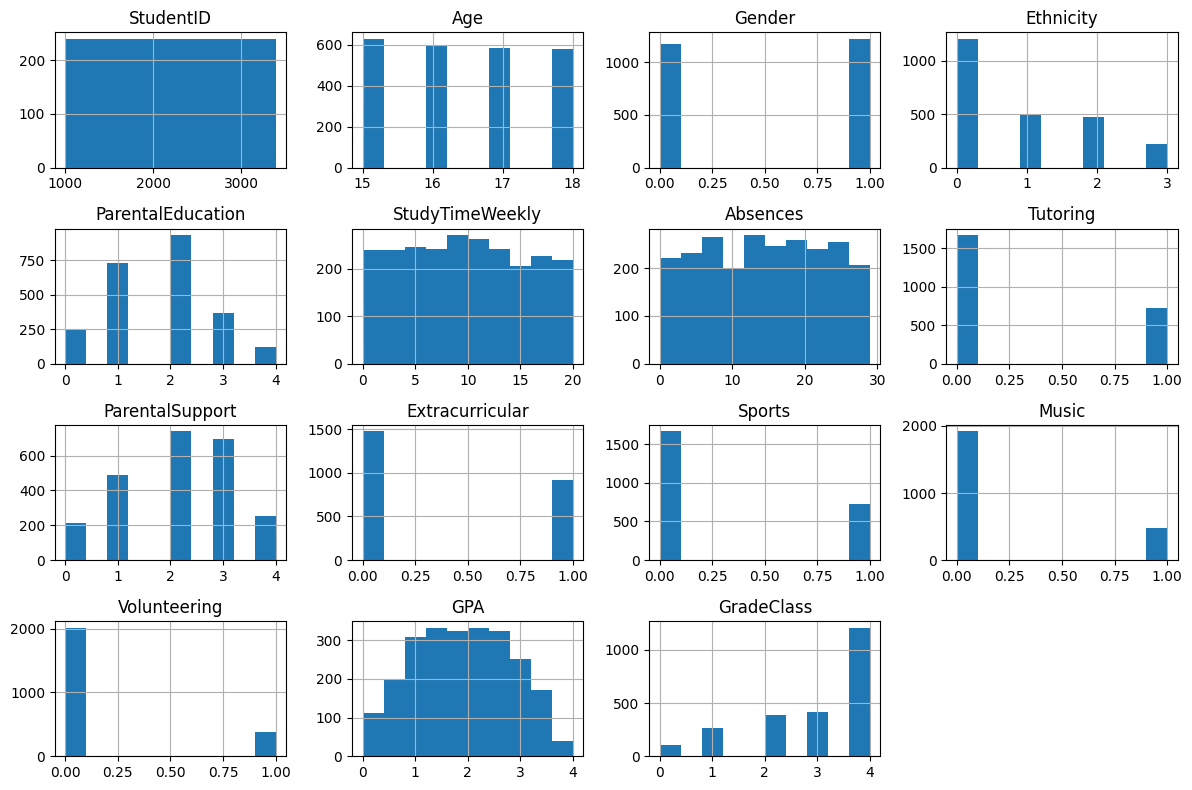

In [12]:
df.select_dtypes(include=np.number).hist(figsize=(12,8))
plt.tight_layout()
plt.show()

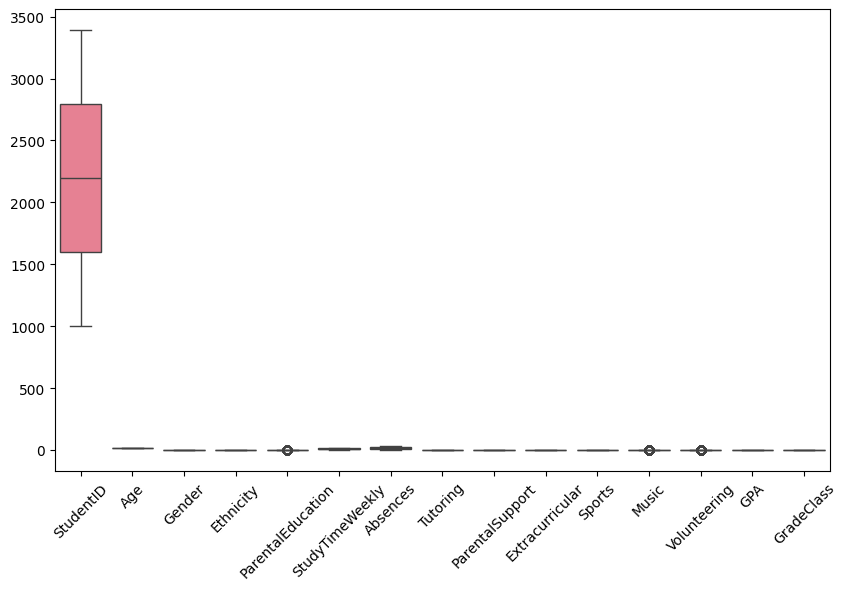

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=45)
plt.show()


In [17]:
Q1 = df['GPA'].quantile(0.25)
Q3 = df['GPA'].quantile(0.75)
IQR = Q3 - Q1

In [15]:
print(df.columns)


Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')


In [18]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [19]:
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


Lower Bound: -0.9963156384671206
Upper Bound: 4.793335255801528


In [21]:
outliers = df[(df['GPA'] < lower_bound) | (df['GPA'] > upper_bound)]
print("Total Outliers:", len(outliers))


Total Outliers: 0


In [32]:
df['outlier_flag'] = np.where(
    (df['GPA'] < lower_bound) | (df['GPA'] > upper_bound),
    1, 0
)

In [33]:
df[['GPA', 'outlier_flag']].head()

,GPA,outlier_flag
0,2.929196,0
1,3.042915,0
2,0.112602,0
3,2.054218,0
4,1.288061,0


In [35]:
df['math score'] = np.where(df['GPA'] > upper_bound, upper_bound, df['GPA'])
df['math score'] = np.where(df['GPA'] < lower_bound, lower_bound, df['GPA'])


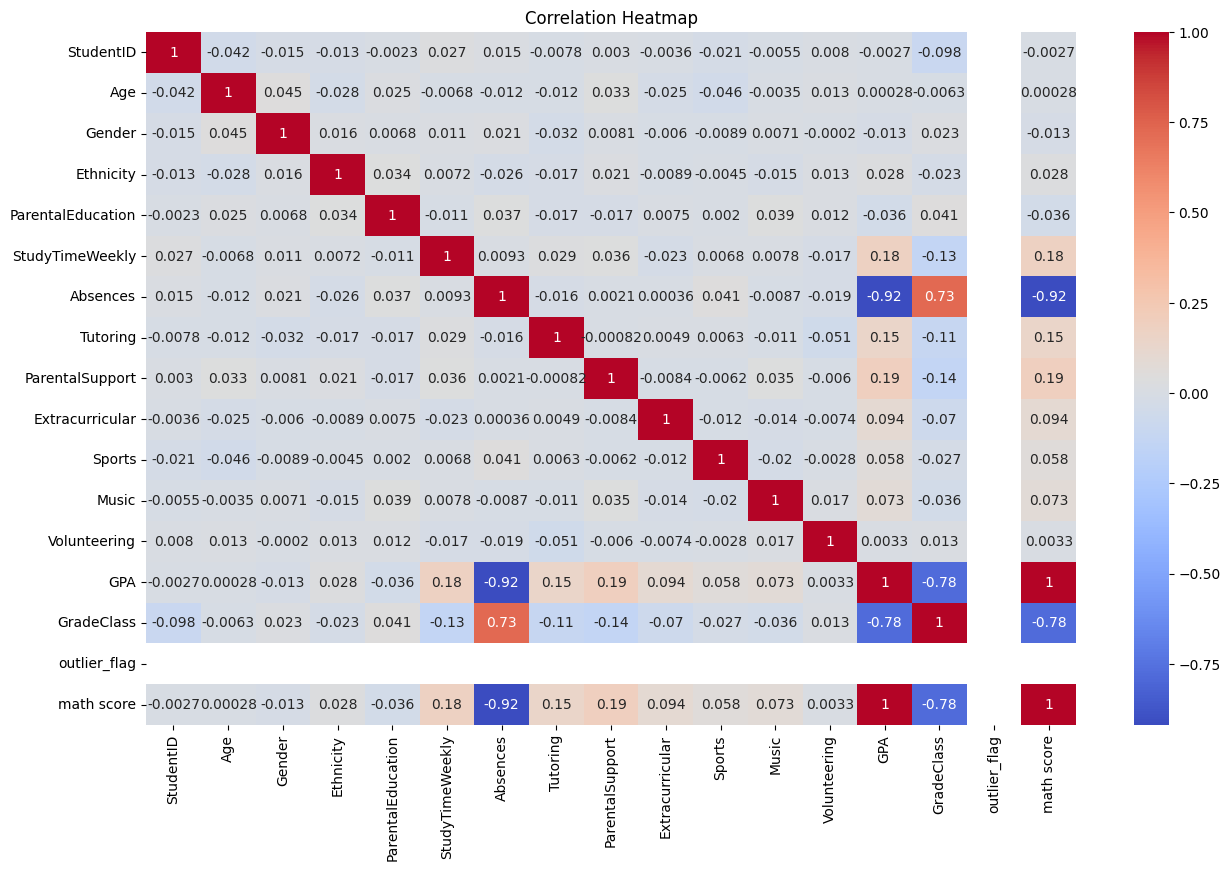

In [42]:
plt.figure(figsize=(15,9))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [43]:
df.to_csv('cleaned_dataset.csv', index=False)
print("cleaned_dataset.csv exported successfully")

cleaned_dataset.csv exported successfully


In [46]:
with open("eda_findings.txt", "w") as f:
    f.write("""
EDA FINDINGS SUMMARY

1. Dataset loaded and basic inspection performed (shape, info, head).
2. Descriptive statistics generated using describe().
3. Missing value percentage checked per column.
4. Distribution visualized using histograms and boxplots.
5. Outliers detected using IQR method on math score.
6. Outlier flag column created.
7. Outliers handled using capping method to avoid data loss.
8. Correlation matrix plotted to understand relationships.
9. Cleaned dataset exported for further analysis.

Conclusion:
EDA helps understand data structure, detect outliers, and improve data quality
before applying machine learning or business analysis.
""")

print("eda_findings.txt created successfully")

eda_findings.txt created successfully
